In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import os
import tensorflow as tf
import tensorflow_addons as tfa
from utils.config import Config
import dataset.train_dataset as dtd
import PIL
import PIL.ImageOps
from tensorflow.keras.utils import plot_model
test_config = Config()
from tensorflow.keras.models import load_model
from model import NASnet_multioutput
import itertools
import seaborn as sns

In [3]:
model = NASnet_multioutput.create_NASnet_multioutupt(test_config)

In [92]:
model.load_weights("weights/NIH_chest_NASnet_model_275_step2")

In [4]:
import dataset.pretrain_dataset as dpd
dataset = dpd.pretrain_dataset_NIH_chest(test_config)
chest_dataset, chest_dataset_val = dataset.initialize_pipeline()
def split_dataset_outputs(x,y):
    return x,(tf.split(y,[1,1,14],1)[2],tf.split(y,[1,1,14],1)[1],tf.split(y,[1,1,14],1)[0])
chest_dataset3 = chest_dataset.map(split_dataset_outputs)
chest_dataset_val3 = chest_dataset_val.map(split_dataset_outputs)

WARNING - Missing permissions to create directory for caching!
WARNING - Missing permissions to create directory for caching!


In [93]:
model.evaluate(chest_dataset_val3,steps=20)

20/20 [==============================] - 19s 928ms/step - loss: 0.6791 - disease_pred_loss: 0.0325 - sex_pred_loss: 0.1540 - age_pred_loss: 107.4407 - disease_pred_binary_accuracy: 0.9247 - sex_pred_binary_accuracy: 0.9560 - age_pred_mae: 8.2177


[array([[0.6935097 ],
        [0.6943649 ],
        [0.6842463 ],
        [0.66139865],
        [0.66780925],
        [0.67837036],
        [0.68817717],
        [0.6962088 ],
        [0.68979126],
        [0.6680984 ],
        [0.66820544],
        [0.68641174],
        [0.68111956],
        [0.67970824],
        [0.66982174],
        [0.67112   ],
        [0.66814995],
        [0.6556267 ],
        [0.6847146 ],
        [0.70561904],
        [0.69485724],
        [0.66915804],
        [0.6899403 ],
        [0.6633531 ],
        [0.66855806]], dtype=float32),
 0.03245466,
 0.15404114,
 107.440735,
 0.92471427,
 0.956,
 8.217674]

[array([[0.0959979 , 0.31985885, 0.13027564, 0.08090553, 0.15126124,
        0.21019721, 0.13054633, 0.19611076, 0.25891042, 0.11627173,
        0.31489846, 0.2032339 , 0.12122321, 0.19101346],
       [0.09217483, 0.2915002 , 0.13692832, 0.12880638, 0.10903203,
        0.25699466, 0.19910005, 0.15121827, 0.29807165, 0.07492888,
        0.28155416, 0.26134545, 0.08684582, 0.20642433],
       [0.06720734, 0.2953481 , 0.06755063, 0.08228794, 0.27047485,
        0.14645839, 0.01646438, 0.10500079, 0.17004722, 0.13558573,
        0.27849382, 0.17762962, 0.12554291, 0.09873736],
       [0.10223663, 0.23950225, 0.08353767, 0.20326361, 0.16976348,
        0.13532731, 0.03215325, 0.11255315, 0.19946069, 0.06254074,
        0.15411443, 0.15213692, 0.08244765, 0.10237974],
       [0.05928642, 0.16382015, 0.11075276, 0.05349565, 0.07302579,
        0.19665915, 0.11276114, 0.12769279, 0.24593252, 0.08732775,
        0.18523848, 0.15925437, 0.07126689, 0.14101392],
       [0.12114695, 0.1096366 , 0.

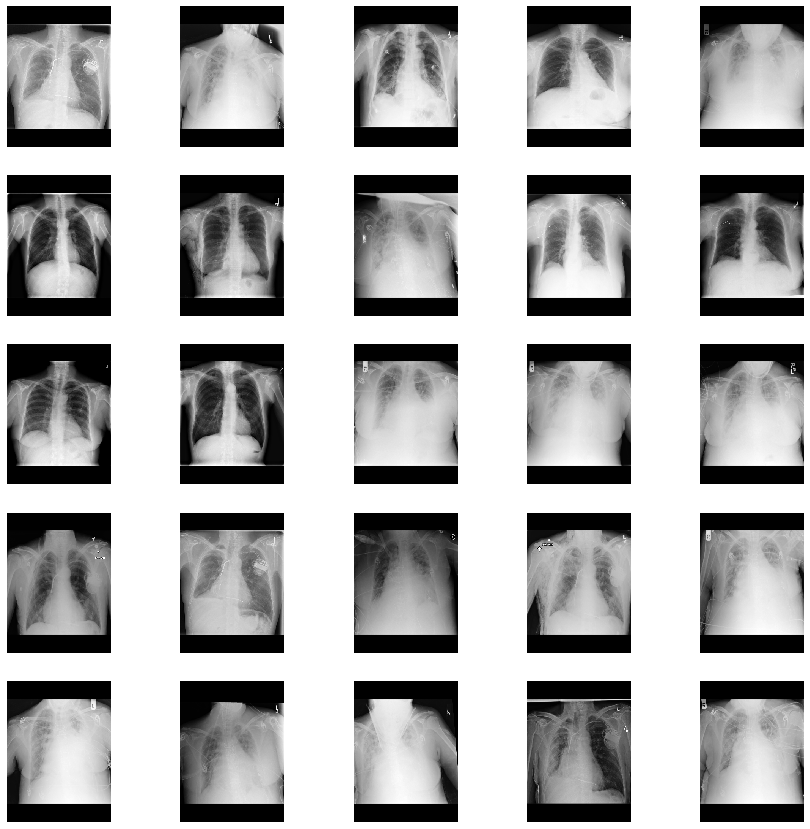

In [85]:
for a,b in chest_dataset_val3.take(1):
    plt.figure(figsize=(15,15))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :, 0],cmap="gray")
        plt.axis('off')
    h = model.predict(a)
    print(h)
    print(b)

In [94]:
truths = [[],[],[]]
preds = [[],[],[]]
for a,b in chest_dataset_val3.take(50):
    h = model.predict(a)
    for i in range(3):
        truths[i].extend(list(itertools.chain(*np.array(b[i]).tolist())))
        preds[i].extend(list(itertools.chain(*np.array(h[i]).tolist())))

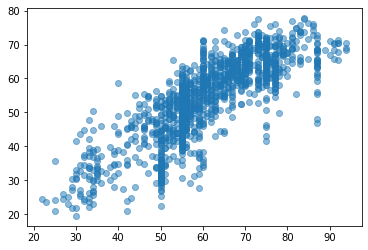

In [95]:
# age
plt.scatter(truths[2],preds[2],alpha=0.5)

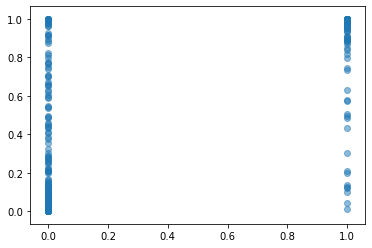

In [96]:
# sex
plt.scatter(truths[1],preds[1],alpha=0.5)

Confusion matrix, without normalization
[[587  43]
 [ 12 608]]
Normalized confusion matrix
[[0.93174603 0.06825397]
 [0.01935484 0.98064516]]


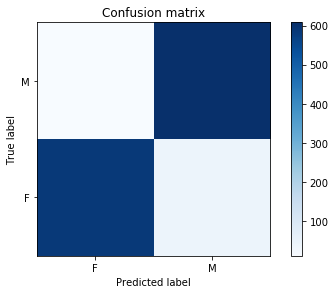

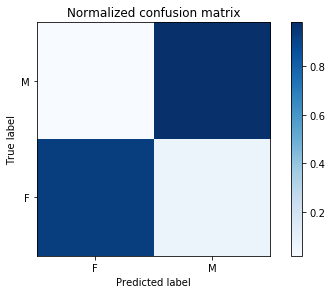

In [97]:
# sex
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = [0,1]
    plt.ylim(-0.5,1.5)
    plt.xticks(tick_marks, ["F","M"])
    plt.yticks(tick_marks, ["F","M"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
h_res = [1 if (x>0.5) else 0 for x in preds[1]]
cm = confusion_matrix(np.array(truths[1]).astype(int) ,h_res, labels=[0,1])

print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')



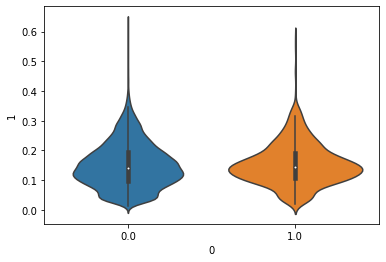

In [98]:
# disease state

disease = pd.DataFrame([truths[0],preds[0]]).T
sns.violinplot(data = disease, x=0,y=1)

In [106]:
import model.keras_nasnet
import importlib
importlib.reload(model.keras_nasnet)

<module 'model.keras_nasnet' from '/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads/model/keras_nasnet.py'>

In [111]:
NAS_7x1920 = model.keras_nasnet.NASNet(input_shape=[test_config.img_height,test_config.img_width,1], include_top=False,weights=None,
      penultimate_filters=1920,
      num_blocks=7,
      stem_block_filters=96,
      skip_reduction=False,
      filter_multiplier=2,)

In [3]:
%load_ext tensorboard

In [4]:
%tensorboard --logdir "logs/tensorboard" --port=7950

In [30]:
NASnet_model = keras.applications.NASNetMobile(input_shape=[test_config.img_height,test_config.img_width,1], include_top=False,weights=None,)

In [31]:
inputs = keras.layers.Input(shape=[test_config.img_height,test_config.img_width,1])

common_part = NASnet_model(inputs)
common_part =  tf.keras.layers.GlobalAveragePooling2D()(common_part)




In [32]:
disease_gender = keras.layers.Dense(16, activation='sigmoid', name='disease_gend_pred')(common_part)


In [33]:
age = keras.layers.Dense(1,activation="linear",name="age_pred")(common_part)

In [34]:
model = keras.models.Model(
    inputs=inputs,
    outputs=[disease_gender, age],
    name="NASnet_multiout")

In [73]:
model.summary()

Model: "NASnet_multiout"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 378, 1) 0                                            
__________________________________________________________________________________________________
NASNet (Model)                  (None, 16, 12, 1056) 4269140     input_2[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 1056)         0           NASNet[1][0]                     
__________________________________________________________________________________________________
disease_pred (Dense)            (None, 14)           14798       global_average_pooling2d[0][0]   
____________________________________________________________________________________

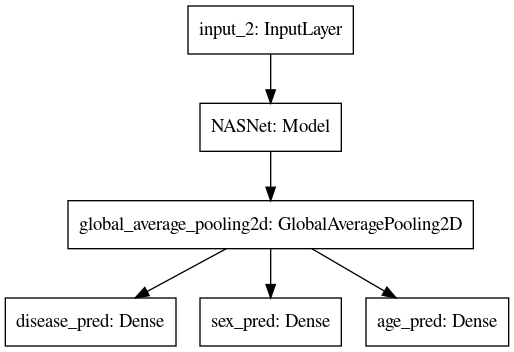

In [14]:
plot_model(model)

In [5]:
losses = {
    "disease_gend_pred": "binary_crossentropy",
    "age_pred": "mean_squared_error",
}
lossWeights = {"disease_gend_pred": 1.0, "age_pred": 0.001}



In [10]:
model.compile(optimizer='adam', loss=losses, loss_weights=lossWeights, metrics=["binary_accuracy","mae"])

In [11]:
import dataset.pretrain_dataset as dpd


In [12]:
import importlib
importlib.reload(dpd)

<module 'dataset.pretrain_dataset' from '/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads/dataset/pretrain_dataset.py'>

In [13]:
dataset = dpd.pretrain_dataset_NIH_chest(test_config)
chest_dataset, chest_dataset_val = dataset.initialize_pipeline()

In [14]:
def split_dataset_outputs(x,y):
    return x,(tf.split(y,[1,16],1)[1],tf.split(y,[1,16],1)[0])
chest_dataset3 = chest_dataset.map(split_dataset_outputs)
chest_dataset_val3 = chest_dataset_val.map(split_dataset_outputs)

In [15]:
H = model.fit(chest_dataset3, validation_data=chest_dataset_val3,
    epochs=2,steps_per_epoch=100,validation_steps=5)

Train for 100 steps, validate for 5 steps
Epoch 1/2
100/100 [==============================] - 152s 2s/step - loss: 0.8500 - disease_gend_pred_loss: 0.2553 - age_pred_loss: 594.6498 - disease_gend_pred_binary_accuracy: 0.8987 - disease_gend_pred_mae: 0.1383 - age_pred_binary_accuracy: 0.0000e+00 - age_pred_mae: 19.1574


AlreadyExistsError: 2 root error(s) found.
  (0) Already exists:  There appears to be a concurrent caching iterator running - cache lockfile already exists ('/mnt/iusers01/jw01/mdefscs4/localscratch/RA_challenge_scratchchest_val_0.lockfile'). If you are sure no other running TF computations are using this cache prefix, delete the lockfile and re-initialize the iterator. Lockfile contents: Created at: 1579985830
	 [[node IteratorGetNext (defined at /mnt/jw01-aruk-home01/projects/functional_genomics/bin/tensorflow_gpu/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
	 [[Shape/_8]]
  (1) Already exists:  There appears to be a concurrent caching iterator running - cache lockfile already exists ('/mnt/iusers01/jw01/mdefscs4/localscratch/RA_challenge_scratchchest_val_0.lockfile'). If you are sure no other running TF computations are using this cache prefix, delete the lockfile and re-initialize the iterator. Lockfile contents: Created at: 1579985830
	 [[node IteratorGetNext (defined at /mnt/jw01-aruk-home01/projects/functional_genomics/bin/tensorflow_gpu/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_90893]

Function call stack:
distributed_function -> distributed_function


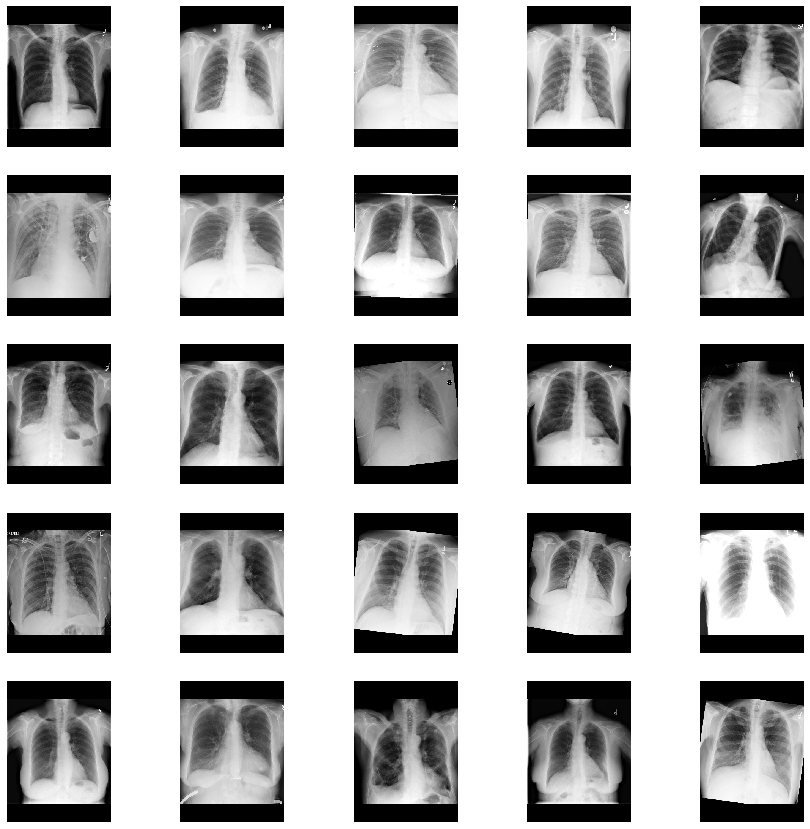

In [7]:
for a,b in chest_dataset3.take(1):
    plt.figure(figsize=(15,15))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :, 0],cmap="gray")
        plt.axis('off')